#### This program estimates alpha according to the number of authors in the publications

In [1]:
from base import * 
import pandas as pd 
import os 
import pickle 
from pathlib import Path 
from src.estimation import estimate_text_distribution
from src.MLE import MLE
import warnings
import numpy as np 
import matplotlib.pyplot as plt 
from copy import deepcopy 
import seaborn as sns 
warnings.filterwarnings("ignore")

In [3]:
subject = "education"
base_loc = f"inference_data/{subject}"
years = [2024, 2023, 2022, 2021]

Let's do some Exploratory Analysis First 

In [14]:
def get_num_authors(article_coll):
    """
    returns the number of authors in each article contained in 
    the input collection 
    Args:
        articl_coll: (ArticleCollection)
    """

    num_authors = []
    for ar_id in article_coll.all_articles:
        ar = article_coll.all_articles[ar_id]
        authors =  ar.authors 
        if authors is not None:
            num_authors.append(len(authors))

    return num_authors

all_authors = []
for y in years:
    with open("inference_data/education/{}/{}_{}_whole.pkl".format(y, subject, y), "rb") as f:
        data = pickle.load(f)
    all_authors += get_num_authors(data)
all_authors = np.asarray(all_authors)
md = np.median(all_authors)
print("Median: {}".format(md))

Median: 2.0


As seen from above cell, the median number of authors is 2. So we will have two bins, 
    1. Articles with number of authors less than 3 
    2. Articles with number of authors more than 2

In [16]:
def combine_collections(coll_list):
    """
    combine the a group of collections into a single collection
    """
    if coll_list is None:
        raise ValueError("the parameter is None")
    if len(coll_list) == 0:
        raise ValueError("empty collection list")
    elif len(coll_list) == 1:
        return coll_list[0]
        
    sample = coll_list[0]
    collection = ArticleCollection(subject=sample.subject)
    for coll in coll_list:
        add_to_sub_collection(collection, coll)
        
    return collection 

def group_by_num_authors(collection, thresh=2):
    """divides the article collection into two groups: 
       1. articles with authors less than or equal to the thresh
       2. articles with authors more than the thresh 
    """
    
    collection1 = ArticleCollection(collection.subject, collection.year)
    collection2 = ArticleCollection(collection.subject, collection.year)

    for ar_id in collection.all_articles:
        ar = collection.all_articles[ar_id]
        authors = ar.authors 
        n = len(authors)
        if authors is not None and n > 0:
            if n <= thresh:
                collection1.add_article(ar, ar_id) 
            else:
                collection2.add_article(ar, ar_id)
    return collection1, collection2
    

In [29]:
thresh = 2 
dest = Path("inference_data/parquet_files/num_authors/{}".format(subject))
dest.mkdir(parents=True, exist_ok=True)
time_window = 1 # the time frame over which we look 
for year in [2024, 2023, 2022, 2021]:
    dest_year = dest / str(year) 
    dest_year.mkdir(parents=True, exist_ok=True) 
    months = np.arange(1, 13) 
    grouped_data = []
    q_count = 0
    for m in months:
        full_path = f"{base_loc}/{year}/{subject}_{year}_{m}.pkl"
        with open(full_path, "rb") as f:
            data = pickle.load(f)
        grouped_data.append(data)
        if len(grouped_data) == time_window:
            combined = combine_collections(grouped_data)
            sub_coll1, sub_coll2 = group_by_num_authors(combined)
            grouped_data = []
            q_count += 1
            name = f"{subject}_{year}_{q_count}"
            print("Year: {}, Month: {}, total: {}, less than {}: {}, more than {}:{}".format(
                            year, m, combined.get_size(), thresh, sub_coll1.get_size(), 
                            thresh, sub_coll2.get_size()))
            sub_coll1.export_parquet(dest_year, f"{name}_less")
            sub_coll2.export_parquet(dest_year, f"{name}_more")

Year: 2024, Month: 1, total: 2836, less than 2: 1674, more than 2:1147
Exporting parquet


100%|███████████████████████████████████████| 1674/1674 [00:39<00:00, 42.48it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_1_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1147/1147 [00:34<00:00, 33.53it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_1_more.parquet
Year: 2024, Month: 2, total: 2353, less than 2: 1514, more than 2:826
Exporting parquet


100%|███████████████████████████████████████| 1514/1514 [00:34<00:00, 44.03it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_2_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 826/826 [00:25<00:00, 32.87it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_2_more.parquet
Year: 2024, Month: 3, total: 2893, less than 2: 1811, more than 2:1068
Exporting parquet


100%|███████████████████████████████████████| 1811/1811 [00:40<00:00, 44.69it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_3_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1068/1068 [00:31<00:00, 34.31it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_3_more.parquet
Year: 2024, Month: 4, total: 1166, less than 2: 766, more than 2:400
Exporting parquet


100%|█████████████████████████████████████████| 766/766 [00:18<00:00, 41.07it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_4_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 400/400 [00:14<00:00, 28.56it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_4_more.parquet
Year: 2024, Month: 5, total: 6, less than 2: 5, more than 2:1
Exporting parquet


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 26.07it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_5_less.parquet
Exporting parquet


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.09it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_5_more.parquet
Year: 2024, Month: 6, total: 25, less than 2: 6, more than 2:19
Exporting parquet


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00, 26.34it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_6_less.parquet
Exporting parquet


100%|███████████████████████████████████████████| 19/19 [00:00<00:00, 29.58it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_6_more.parquet
Year: 2024, Month: 7, total: 0, less than 2: 0, more than 2:0
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_7_less.parquet
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_7_more.parquet
Year: 2024, Month: 8, total: 4, less than 2: 3, more than 2:1
Exporting parquet


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 28.75it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_8_less.parquet
Exporting parquet


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 25.33it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_8_more.parquet
Year: 2024, Month: 9, total: 1, less than 2: 0, more than 2:1
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_9_less.parquet
Exporting parquet


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 22.51it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_9_more.parquet
Year: 2024, Month: 10, total: 0, less than 2: 0, more than 2:0
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_10_less.parquet
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_10_more.parquet
Year: 2024, Month: 11, total: 0, less than 2: 0, more than 2:0
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_11_less.parquet
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_11_more.parquet
Year: 2024, Month: 12, total: 2, less than 2: 2, more than 2:0
Exporting parquet


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 32.33it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_12_less.parquet
Exporting parquet


0it [00:00, ?it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2024/education_2024_12_more.parquet
Year: 2023, Month: 1, total: 2677, less than 2: 1632, more than 2:1029
Exporting parquet


100%|███████████████████████████████████████| 1632/1632 [00:40<00:00, 40.41it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_1_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1029/1029 [00:31<00:00, 32.71it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_1_more.parquet
Year: 2023, Month: 2, total: 2532, less than 2: 1665, more than 2:802
Exporting parquet


100%|███████████████████████████████████████| 1665/1665 [00:39<00:00, 42.47it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_2_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 802/802 [00:25<00:00, 31.98it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_2_more.parquet
Year: 2023, Month: 3, total: 3504, less than 2: 2362, more than 2:1128
Exporting parquet


100%|███████████████████████████████████████| 2362/2362 [00:55<00:00, 42.41it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_3_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1128/1128 [00:34<00:00, 32.35it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_3_more.parquet
Year: 2023, Month: 4, total: 3573, less than 2: 2336, more than 2:1221
Exporting parquet


100%|███████████████████████████████████████| 2336/2336 [00:51<00:00, 45.08it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_4_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1221/1221 [00:38<00:00, 31.57it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_4_more.parquet
Year: 2023, Month: 5, total: 3737, less than 2: 2521, more than 2:1195
Exporting parquet


100%|███████████████████████████████████████| 2521/2521 [00:54<00:00, 46.11it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_5_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1195/1195 [00:36<00:00, 33.13it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_5_more.parquet
Year: 2023, Month: 6, total: 4869, less than 2: 2957, more than 2:1884
Exporting parquet


100%|███████████████████████████████████████| 2957/2957 [01:12<00:00, 40.95it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_6_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1884/1884 [01:06<00:00, 28.25it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_6_more.parquet
Year: 2023, Month: 7, total: 3365, less than 2: 1917, more than 2:1434
Exporting parquet


100%|███████████████████████████████████████| 1917/1917 [00:53<00:00, 35.60it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_7_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1434/1434 [00:45<00:00, 31.78it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_7_more.parquet
Year: 2023, Month: 8, total: 2926, less than 2: 1738, more than 2:1173
Exporting parquet


100%|███████████████████████████████████████| 1738/1738 [00:47<00:00, 36.68it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_8_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1173/1173 [00:36<00:00, 32.16it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_8_more.parquet
Year: 2023, Month: 9, total: 2752, less than 2: 1598, more than 2:1145
Exporting parquet


100%|███████████████████████████████████████| 1598/1598 [00:41<00:00, 38.82it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_9_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1145/1145 [00:38<00:00, 29.97it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_9_more.parquet
Year: 2023, Month: 10, total: 2878, less than 2: 1752, more than 2:1093
Exporting parquet


100%|███████████████████████████████████████| 1752/1752 [00:42<00:00, 40.89it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_10_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1093/1093 [00:38<00:00, 28.32it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_10_more.parquet
Year: 2023, Month: 11, total: 3090, less than 2: 1915, more than 2:1158
Exporting parquet


100%|███████████████████████████████████████| 1915/1915 [00:46<00:00, 41.53it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_11_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1158/1158 [00:37<00:00, 30.66it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_11_more.parquet
Year: 2023, Month: 12, total: 4704, less than 2: 2794, more than 2:1902
Exporting parquet


100%|███████████████████████████████████████| 2794/2794 [01:07<00:00, 41.64it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_12_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1902/1902 [00:58<00:00, 32.50it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2023/education_2023_12_more.parquet
Year: 2022, Month: 1, total: 2098, less than 2: 1402, more than 2:684
Exporting parquet


100%|███████████████████████████████████████| 1402/1402 [00:38<00:00, 36.77it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_1_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 684/684 [00:21<00:00, 31.99it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_1_more.parquet
Year: 2022, Month: 2, total: 2198, less than 2: 1509, more than 2:683
Exporting parquet


100%|███████████████████████████████████████| 1509/1509 [00:38<00:00, 39.35it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_2_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 683/683 [00:21<00:00, 32.00it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_2_more.parquet
Year: 2022, Month: 3, total: 2403, less than 2: 1546, more than 2:850
Exporting parquet


100%|███████████████████████████████████████| 1546/1546 [00:40<00:00, 38.43it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_3_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 850/850 [00:27<00:00, 31.42it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_3_more.parquet
Year: 2022, Month: 4, total: 2489, less than 2: 1679, more than 2:801
Exporting parquet


100%|███████████████████████████████████████| 1679/1679 [00:42<00:00, 39.58it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_4_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 801/801 [00:27<00:00, 28.87it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_4_more.parquet
Year: 2022, Month: 5, total: 2292, less than 2: 1519, more than 2:764
Exporting parquet


100%|███████████████████████████████████████| 1519/1519 [00:38<00:00, 39.54it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_5_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 764/764 [00:23<00:00, 32.12it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_5_more.parquet
Year: 2022, Month: 6, total: 3870, less than 2: 2591, more than 2:1270
Exporting parquet


100%|███████████████████████████████████████| 2591/2591 [01:07<00:00, 38.28it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_6_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1270/1270 [00:39<00:00, 31.75it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_6_more.parquet
Year: 2022, Month: 7, total: 2181, less than 2: 1385, more than 2:789
Exporting parquet


100%|███████████████████████████████████████| 1385/1385 [00:37<00:00, 36.80it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_7_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 789/789 [00:24<00:00, 31.96it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_7_more.parquet
Year: 2022, Month: 8, total: 2130, less than 2: 1316, more than 2:810
Exporting parquet


100%|███████████████████████████████████████| 1316/1316 [00:36<00:00, 36.09it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_8_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 810/810 [00:25<00:00, 31.54it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_8_more.parquet
Year: 2022, Month: 9, total: 2348, less than 2: 1401, more than 2:937
Exporting parquet


100%|███████████████████████████████████████| 1401/1401 [00:39<00:00, 35.65it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_9_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 937/937 [00:29<00:00, 31.31it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_9_more.parquet
Year: 2022, Month: 10, total: 2481, less than 2: 1556, more than 2:916
Exporting parquet


100%|███████████████████████████████████████| 1556/1556 [00:40<00:00, 38.68it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_10_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 916/916 [00:29<00:00, 31.55it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_10_more.parquet
Year: 2022, Month: 11, total: 3044, less than 2: 1964, more than 2:1062
Exporting parquet


100%|███████████████████████████████████████| 1964/1964 [00:47<00:00, 41.05it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_11_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1062/1062 [00:33<00:00, 31.37it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_11_more.parquet
Year: 2022, Month: 12, total: 4669, less than 2: 2942, more than 2:1710
Exporting parquet


100%|███████████████████████████████████████| 2942/2942 [01:15<00:00, 38.90it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_12_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1710/1710 [00:54<00:00, 31.59it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2022/education_2022_12_more.parquet
Year: 2021, Month: 1, total: 1778, less than 2: 1196, more than 2:562
Exporting parquet


100%|███████████████████████████████████████| 1196/1196 [00:33<00:00, 35.32it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_1_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 562/562 [00:17<00:00, 32.55it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_1_more.parquet
Year: 2021, Month: 2, total: 1641, less than 2: 1095, more than 2:533
Exporting parquet


100%|███████████████████████████████████████| 1095/1095 [00:29<00:00, 36.68it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_2_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 533/533 [00:17<00:00, 31.04it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_2_more.parquet
Year: 2021, Month: 3, total: 2152, less than 2: 1409, more than 2:733
Exporting parquet


100%|███████████████████████████████████████| 1409/1409 [00:40<00:00, 35.00it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_3_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 733/733 [00:23<00:00, 30.82it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_3_more.parquet
Year: 2021, Month: 4, total: 2256, less than 2: 1634, more than 2:613
Exporting parquet


100%|███████████████████████████████████████| 1634/1634 [00:44<00:00, 36.96it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_4_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 613/613 [00:19<00:00, 31.26it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_4_more.parquet
Year: 2021, Month: 5, total: 2421, less than 2: 1682, more than 2:716
Exporting parquet


100%|███████████████████████████████████████| 1682/1682 [00:46<00:00, 36.43it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_5_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 716/716 [00:22<00:00, 31.57it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_5_more.parquet
Year: 2021, Month: 6, total: 3045, less than 2: 2007, more than 2:1019
Exporting parquet


100%|███████████████████████████████████████| 2007/2007 [00:57<00:00, 35.20it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_6_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1019/1019 [00:33<00:00, 30.80it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_6_more.parquet
Year: 2021, Month: 7, total: 2162, less than 2: 1424, more than 2:734
Exporting parquet


100%|███████████████████████████████████████| 1424/1424 [00:42<00:00, 33.53it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_7_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 734/734 [00:23<00:00, 31.18it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_7_more.parquet
Year: 2021, Month: 8, total: 2074, less than 2: 1220, more than 2:837
Exporting parquet


100%|███████████████████████████████████████| 1220/1220 [00:37<00:00, 32.94it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_8_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 837/837 [00:26<00:00, 31.77it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_8_more.parquet
Year: 2021, Month: 9, total: 2182, less than 2: 1349, more than 2:822
Exporting parquet


100%|███████████████████████████████████████| 1349/1349 [00:40<00:00, 32.90it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_9_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 822/822 [00:26<00:00, 30.57it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_9_more.parquet
Year: 2021, Month: 10, total: 2019, less than 2: 1269, more than 2:719
Exporting parquet


100%|███████████████████████████████████████| 1269/1269 [00:36<00:00, 34.90it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_10_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 719/719 [00:22<00:00, 32.39it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_10_more.parquet
Year: 2021, Month: 11, total: 2382, less than 2: 1518, more than 2:847
Exporting parquet


100%|███████████████████████████████████████| 1518/1518 [00:43<00:00, 34.84it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_11_less.parquet
Exporting parquet


100%|█████████████████████████████████████████| 847/847 [00:27<00:00, 30.67it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_11_more.parquet
Year: 2021, Month: 12, total: 3959, less than 2: 2465, more than 2:1480
Exporting parquet


100%|███████████████████████████████████████| 2465/2465 [01:13<00:00, 33.75it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_12_less.parquet
Exporting parquet


100%|███████████████████████████████████████| 1480/1480 [00:46<00:00, 31.71it/s]


File Exported as: inference_data/parquet_files/num_authors/education/2021/education_2021_12_more.parquet


In [30]:
parquet_base_loc = "inference_data/parquet_files/num_authors/{}".format(subject)
name = "ojs_ed"
all_results_less = {}
all_results_more = {}
model= MLE(f"distribution/{name}.parquet")
for year in [2024, 2023, 2022, 2021]:
    if year not in all_results_less:
        all_results_less[year] = {}
    if year not in all_results_more:
        all_results_more[year] = {}
    parquet_year_path = "{}/{}".format(parquet_base_loc, year) 
    for f in sorted(os.listdir(parquet_year_path)):
        if ".parquet" in f and "whole" not in f:
            print("File: {}".format(f))
            quarter = int(f.strip(".parquet").split("_")[-2])
            full_path = "{}/{}".format(parquet_year_path, f)
            estimated,ci = model.inference(full_path,
                                     ground_truth=None, save=False)
            if estimated is not None and ci is not None :
                print(f"{estimated:10.3f},{ci:10.3f}")
                if "less" in f:
                    all_results_less[year][quarter] = (estimated, ci)
                elif "more" in f:
                    all_results_more[year][quarter] = (estimated, ci)

File: education_2024_10_less.parquet
ERROR
File: education_2024_10_more.parquet
ERROR
File: education_2024_11_less.parquet
ERROR
File: education_2024_11_more.parquet
ERROR
File: education_2024_12_less.parquet
     0.411,     0.327
File: education_2024_12_more.parquet
ERROR
File: education_2024_1_less.parquet
     0.298,     0.011
File: education_2024_1_more.parquet
     0.214,     0.010
File: education_2024_2_less.parquet
     0.358,     0.011
File: education_2024_2_more.parquet
     0.210,     0.011
File: education_2024_3_less.parquet
     0.328,     0.010
File: education_2024_3_more.parquet
     0.230,     0.011
File: education_2024_4_less.parquet
     0.345,     0.016
File: education_2024_4_more.parquet
     0.233,     0.016
File: education_2024_5_less.parquet
     0.328,     0.174
File: education_2024_5_more.parquet
     0.492,     0.378
File: education_2024_6_less.parquet
     0.160,     0.110
File: education_2024_6_more.parquet
     0.227,     0.074
File: education_2024_7_less.pa

In [31]:
output_folder = Path("output")
output_folder.mkdir(parents=True, exist_ok=True) 
with open(output_folder / "num_author_trend_results_less_quarter.pkl", "wb") as f:
    pickle.dump(all_results_less, f) 
with open(output_folder / "num_author_trend_results_more_quarter.pkl", "wb") as f:
    pickle.dump(all_results_more, f)

m: [0.037 0.029 0.047 0.028 0.046 0.04  0.033 0.031 0.049 0.047 0.029 0.033
 0.03  0.059 0.029 0.028 0.056 0.046 0.038 0.027 0.049 0.048 0.04  0.035
 0.033 0.045 0.074 0.071 0.091 0.09  0.107 0.096 0.127 0.128 0.142 0.169
 0.214]


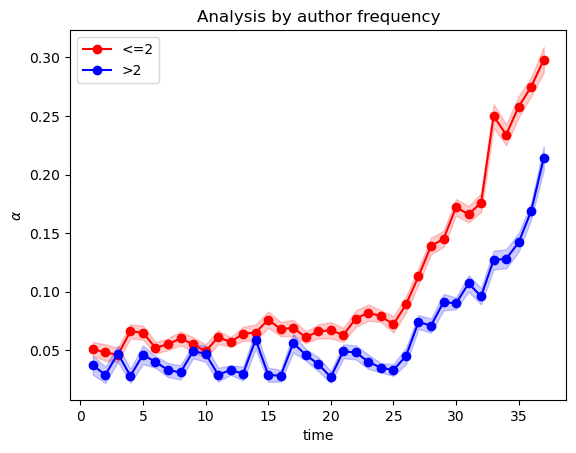

In [32]:
def convert_to_array(all_results):
    """
    extracts the alpha and confidence interval values from a dictionary 
    and converts them into array
    """
    alpha_li = []
    ci_li = []
    year_month = []
    for key1 in sorted(all_results.keys()):
        for key2 in sorted(all_results[key1]):
            if key1 != 2024:
                alpha_li.append(all_results[key1][key2][0])
                ci_li.append(all_results[key1][key2][1])
            else:
                if key2 < 2:
                    alpha_li.append(all_results[key1][key2][0])
                    ci_li.append(all_results[key1][key2][1])
            year_month.append("{}-{}".format(key1, key2))
    return np.asarray(alpha_li), np.asarray(ci_li), year_month


#output_folder = Path("output")
#output_folder.mkdir(parents=True, exist_ok=True) 
#with open(output_folder / "author_trend_results_less.pkl", "rb") as f:
#    all_results_less = pickle.load(f)
#with open(output_folder / "author_trend_results_more.pkl", "rb") as f:
#    all_results_more = pickle.load(f)
    
alpha_s, ci_s, x_lab = convert_to_array(all_results_less)
alpha_m, ci_m, x_lab = convert_to_array(all_results_more)
time = np.arange(1, len(alpha_s) +1)
#xticks = np.arange(0, len(ci_s), 3)
print("m:", alpha_m)
#tick_labs = [x_lab[i] for i in xticks]
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1) 
axes.set_xlabel("time")
axes.set_ylabel(r"$\alpha$") 
axes.set_title("Analysis by author frequency")
axes.plot(time, alpha_s, "-o", label="<={}".format(2), color="red")
axes.plot(time, alpha_m, "-o", label=">{}".format(2), color="blue")
axes.fill_between(time, (alpha_s-ci_s), (alpha_s+ci_s), 
                color='red', alpha=.2)
axes.fill_between(time, (alpha_m-ci_m), (alpha_m+ci_m), 
                color='blue', alpha=.2)
axes.legend()
#axes.set_xticks(xticks, tick_labs, rotation=90)